## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

"head" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [3]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [4]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET, sep=',')
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')

happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [5]:
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [48]:
# Write your code here
happiness['country'] = happiness['country'].apply(lambda x: x.lower())
country_features = happiness.merge(countries, how = 'outer', left_on = 'country', right_on= 'country_name').drop(labels='country_name', axis=1)

country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [18]:
# Write your code here
top_10_countries = happiness.sort_values(by = 'happiness_score', ascending=False)
print(top_10_countries['country'].head(10))

38         finland
31         denmark
115    switzerland
50         iceland
92          norway
87     netherlands
114         sweden
88     new zealand
6          austria
72      luxembourg
Name: country, dtype: object


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [24]:
# Write your code here
regions_features = country_features.groupby('world_region').agg(
    avg_happiness = ('happiness_score','mean'),
    tot_countries = ('country','count')
)

print(regions_features.sort_values(by = 'avg_happiness', ascending=False))

                                    avg_happiness  tot_countries
world_region                                                    
North America and ANZ                    7.173525              4
Western Europe                           6.967405             20
Latin America and Caribbean              5.971280             20
Central and Eastern Europe               5.891393             14
Southeast Asia                           5.517788              8
East Asia                                5.483633              3
Commonwealth of Independent States       5.358342             12
Middle East and North Africa             5.269306             16
Sub-Saharan Africa                       4.393856             32
South Asia                               4.355083              6


The first region has only a few countries! What are them and what is their score?

In [27]:
# Write your code here
north_america = country_features[country_features['world_region'] == 'North America and ANZ'][['country','happiness_score']]
north_america

,country,happiness_score
5,australia,7.2228
21,canada,7.2321
88,new zealand,7.2996
127,united states,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [59]:
# Write your code here
# country_features['literacy'] = country_features['literacy'].str.replace(',','.').astype(float)
lit_100 = country_features[country_features['literacy'] == 100.0]
for country in lit_100['country'].to_list():
    world_region = lit_100[lit_100['country'] == country]['world_region']
    score = lit_100[lit_100['country'] == country]['happiness_score']
    print(f'{world_region} - {country}({score}) \n')

5    North America and ANZ
Name: world_region, dtype: object - australia(5    7.2228
Name: happiness_score, dtype: float64) 

31    Western Europe
Name: world_region, dtype: object - denmark(31    7.6456
Name: happiness_score, dtype: float64) 

38    Western Europe
Name: world_region, dtype: object - finland(38    7.8087
Name: happiness_score, dtype: float64) 

72    Western Europe
Name: world_region, dtype: object - luxembourg(72    7.2375
Name: happiness_score, dtype: float64) 

92    Western Europe
Name: world_region, dtype: object - norway(92    7.488
Name: happiness_score, dtype: float64) 



What is the global average?

In [68]:
# Write your code here
avg_literacy = country_features['literacy'].mean()
print('The global average of literacy is {:.2f}'.format(avg_literacy))

The global average of literacy is 81.85


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [69]:
# Write your code here
lit_under_50 = country_features[country_features['literacy'] < 50.0]
tot_countries = len(country_features['country'].unique())

print('The proportion of countries with literacy under 50% is {:.2f}%'.format(len(lit_under_50) / tot_countries * 100))

The proportion of countries with literacy under 50% is 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [89]:
# Write your code here
illiterate = country_features.population * (100 - country_features.literacy)/100
tot_population = country_features['population'].sum()
print('Illiterate population number {:.2f} \n'.format(illiterate.sum()))
print('Illiterate population percentage {:.2f}%'.format((illiterate.sum()) / tot_population * 100))

Illiterate population number 1249372988.10 

Illiterate population percentage 20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [77]:
# Write your code here
country_features['population_density'] = country_features['population'] / country_features['area']

What is the happiness score of the 3 countries with the lowest population density?

In [80]:
# Write your code here
low_pop_denisty = country_features.sort_values(by='population_density')[['country','happiness_score']]
print(low_pop_denisty.head(3))

      country  happiness_score
83   mongolia           5.4562
5   australia           7.2228
14   botswana           3.4789


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

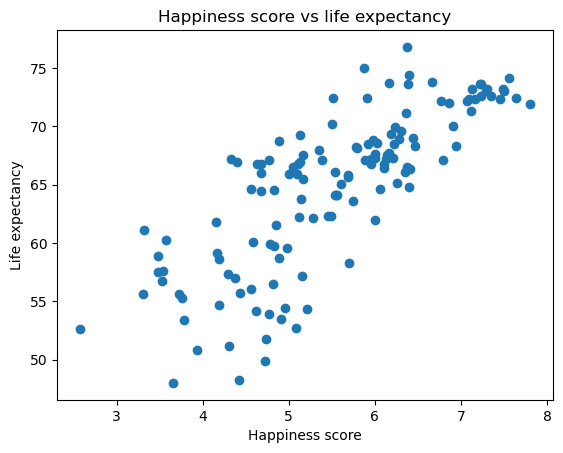

In [85]:
# Write your code here
import matplotlib.pyplot as plt
plt.scatter(country_features['happiness_score'], country_features['healthy_life_expectancy'])
plt.xlabel('Happiness score')
plt.ylabel('Life expectancy')
plt.title('Happiness score vs life expectancy')
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.